Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/fjcreate/'

N = 10_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}6/fork_join_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}6/fork_join_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}6/fork_join_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}6/fork_join_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 14:07:47 2025 +0200) (510.27ms ela...,0.181,0.0000,0.308,0.39,0.07,4.89,53.68 C,Nominal
1,(Mon Mar 31 14:07:47 2025 +0200) (507.67ms ela...,0.243,0.0311,0.346,0.43,0.15,10.60,53.68 C,Nominal
2,(Mon Mar 31 14:07:48 2025 +0200) (506.02ms ela...,1.130,0.0000,0.298,1.27,0.20,15.79,53.74 C,Nominal
3,(Mon Mar 31 14:07:48 2025 +0200) (508.14ms ela...,0.138,0.0000,0.277,0.23,0.07,5.69,53.74 C,Nominal
4,(Mon Mar 31 14:07:49 2025 +0200) (508.36ms ela...,0.141,0.0000,0.272,0.21,0.07,5.15,53.45 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(872, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 14:07:59 2025 +0200) (1008.57ms el...,39.9,0.0000,0.906,42.69,3.96,99.28,56.12 C,Nominal
1,(Mon Mar 31 14:08:00 2025 +0200) (1005.77ms el...,33.7,0.0509,1.140,36.96,3.69,96.81,58.97 C,Nominal
2,(Mon Mar 31 14:08:01 2025 +0200) (1005.45ms el...,33.8,0.0000,1.380,37.10,3.71,96.70,61.21 C,Nominal
3,(Mon Mar 31 14:08:02 2025 +0200) (1006.31ms el...,34.7,0.0000,1.060,37.73,3.63,96.62,63.35 C,Nominal
4,(Mon Mar 31 14:08:03 2025 +0200) (1004.30ms el...,33.6,0.0000,1.570,37.03,3.65,96.68,64.78 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 14:26:37 2025 +0200) (511.14ms ela...,0.2580,0.000,0.260,0.33,0.06,4.40,44.66 C,Nominal
1,(Mon Mar 31 14:26:37 2025 +0200) (509.11ms ela...,0.1060,0.034,0.374,0.21,0.05,3.68,44.66 C,Nominal
2,(Mon Mar 31 14:26:38 2025 +0200) (508.70ms ela...,1.0900,0.000,0.277,1.21,0.20,16.43,44.93 C,Nominal
3,(Mon Mar 31 14:26:38 2025 +0200) (508.26ms ela...,0.0566,0.000,0.261,0.09,0.03,2.24,44.93 C,Nominal
4,(Mon Mar 31 14:26:39 2025 +0200) (508.65ms ela...,0.4350,0.000,0.295,0.63,0.23,17.39,44.99 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(960, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 31 14:26:49 2025 +0200) (1011.25ms el...,14.2,0.00000,0.931,14.97,1.60,98.37,45.54 C,Nominal
1,(Mon Mar 31 14:26:50 2025 +0200) (1005.42ms el...,14.6,0.00000,0.709,15.34,1.74,97.53,47.25 C,Nominal
2,(Mon Mar 31 14:26:51 2025 +0200) (1005.29ms el...,14.4,0.00000,0.718,15.06,1.69,96.93,48.96 C,Nominal
3,(Mon Mar 31 14:26:52 2025 +0200) (1006.72ms el...,20.9,0.00346,1.040,21.94,2.48,96.23,51.31 C,Nominal
4,(Mon Mar 31 14:26:53 2025 +0200) (1005.69ms el...,14.8,0.00000,0.711,17.07,1.78,97.70,52.05 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 14:07:47,0.181,0.0000,0.308,0.39,0.07,4.89,53.68,Nominal,510.27
1,2025-03-31 14:07:47,0.243,0.0311,0.346,0.43,0.15,10.60,53.68,Nominal,507.67
2,2025-03-31 14:07:48,1.130,0.0000,0.298,1.27,0.20,15.79,53.74,Nominal,506.02
3,2025-03-31 14:07:48,0.138,0.0000,0.277,0.23,0.07,5.69,53.74,Nominal,508.14
4,2025-03-31 14:07:49,0.141,0.0000,0.272,0.21,0.07,5.15,53.45,Nominal,508.36


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(872, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 14:07:59,39.9,0.0000,0.906,42.69,3.96,99.28,56.12,Nominal,1008.57
1,2025-03-31 14:08:00,33.7,0.0509,1.140,36.96,3.69,96.81,58.97,Nominal,1005.77
2,2025-03-31 14:08:01,33.8,0.0000,1.380,37.10,3.71,96.70,61.21,Nominal,1005.45
3,2025-03-31 14:08:02,34.7,0.0000,1.060,37.73,3.63,96.62,63.35,Nominal,1006.31
4,2025-03-31 14:08:03,33.6,0.0000,1.570,37.03,3.65,96.68,64.78,Nominal,1004.30


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 14:26:37,0.2580,0.000,0.260,0.33,0.06,4.40,44.66,Nominal,511.14
1,2025-03-31 14:26:37,0.1060,0.034,0.374,0.21,0.05,3.68,44.66,Nominal,509.11
2,2025-03-31 14:26:38,1.0900,0.000,0.277,1.21,0.20,16.43,44.93,Nominal,508.70
3,2025-03-31 14:26:38,0.0566,0.000,0.261,0.09,0.03,2.24,44.93,Nominal,508.26
4,2025-03-31 14:26:39,0.4350,0.000,0.295,0.63,0.23,17.39,44.99,Nominal,508.65


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(960, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-31 14:26:49,14.2,0.00000,0.931,14.97,1.60,98.37,45.54,Nominal,1011.25
1,2025-03-31 14:26:50,14.6,0.00000,0.709,15.34,1.74,97.53,47.25,Nominal,1005.42
2,2025-03-31 14:26:51,14.4,0.00000,0.718,15.06,1.69,96.93,48.96,Nominal,1005.29
3,2025-03-31 14:26:52,20.9,0.00346,1.040,21.94,2.48,96.23,51.31,Nominal,1006.72
4,2025-03-31 14:26:53,14.8,0.00000,0.711,17.07,1.78,97.70,52.05,Nominal,1005.69


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


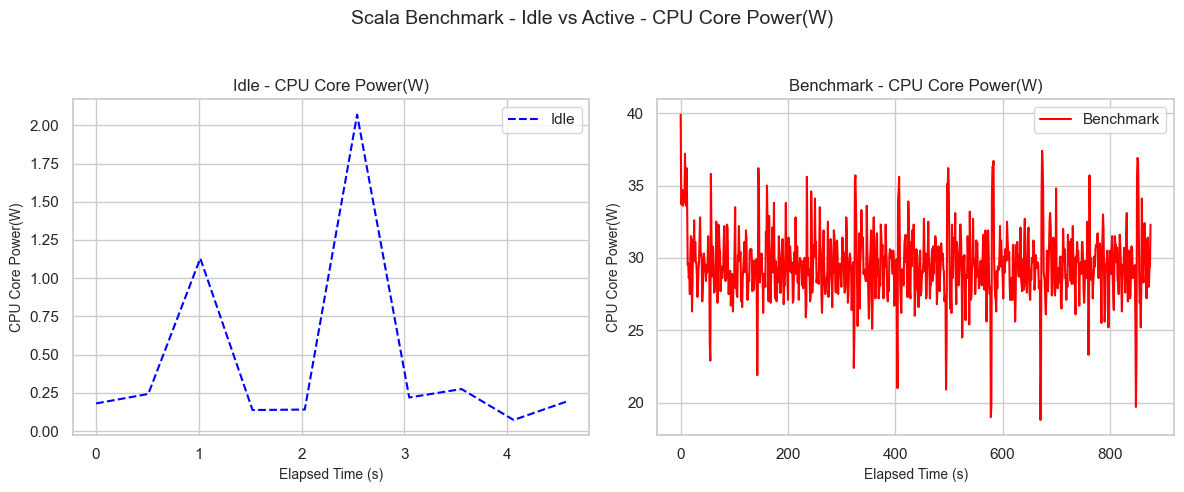

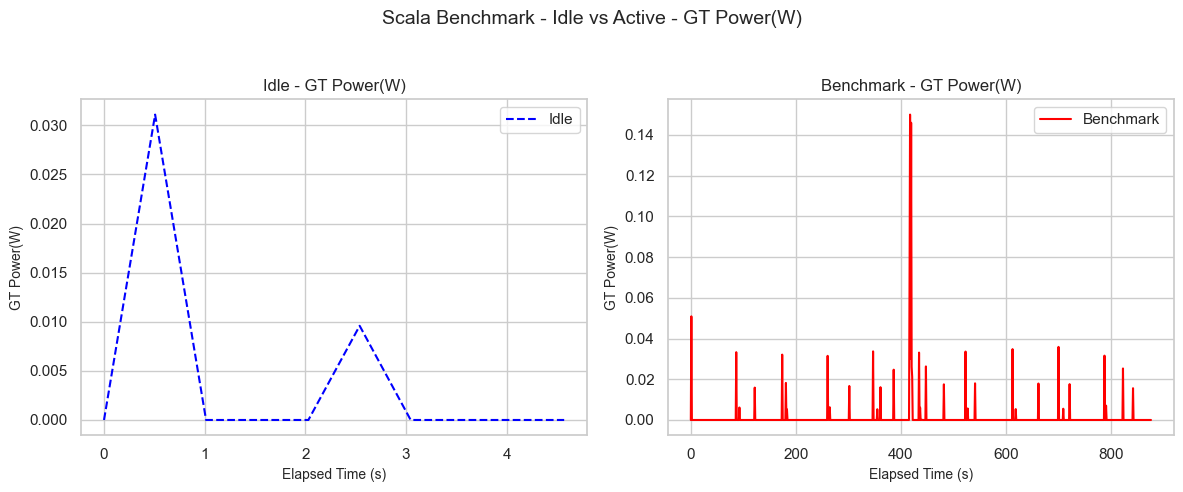

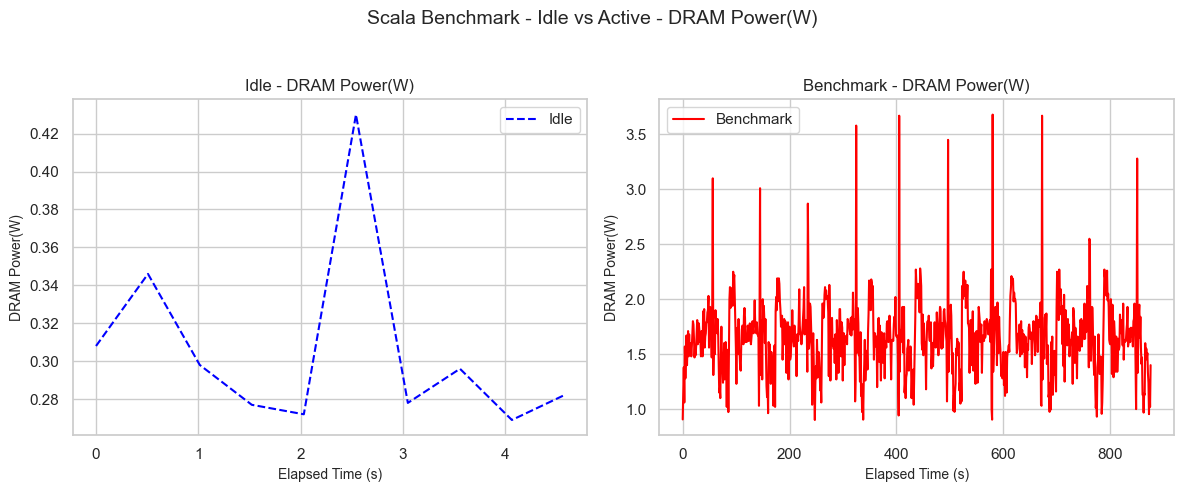

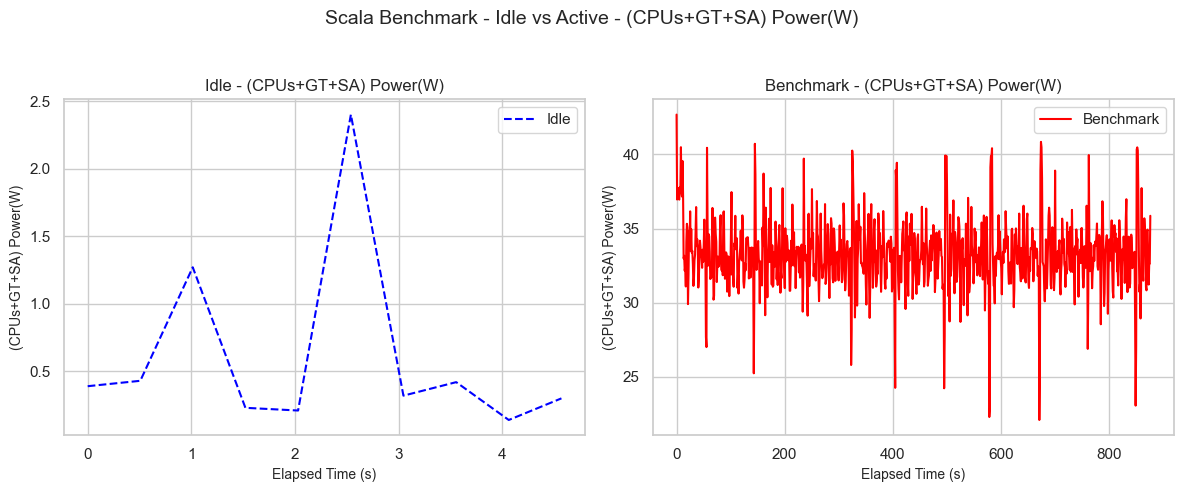

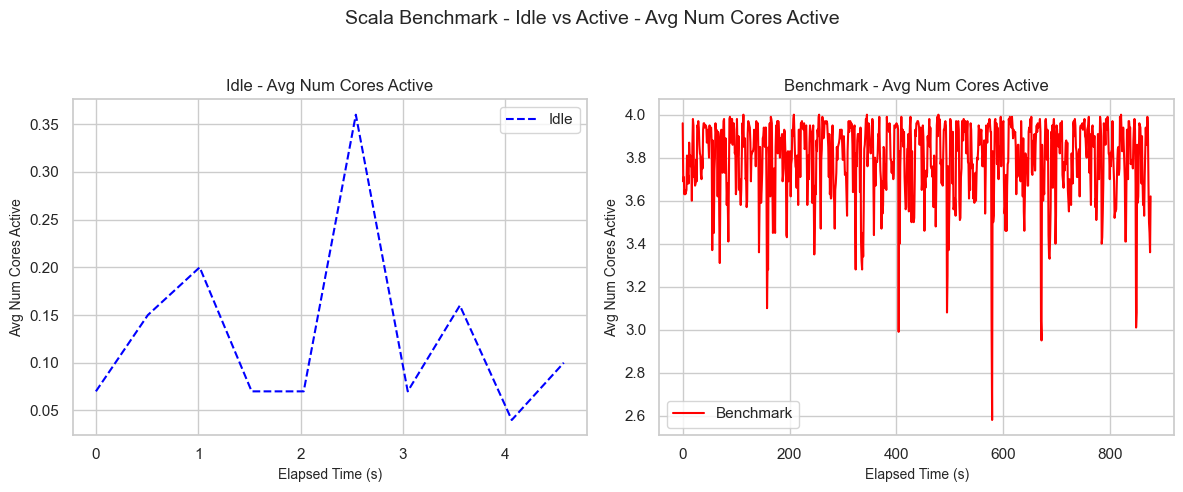

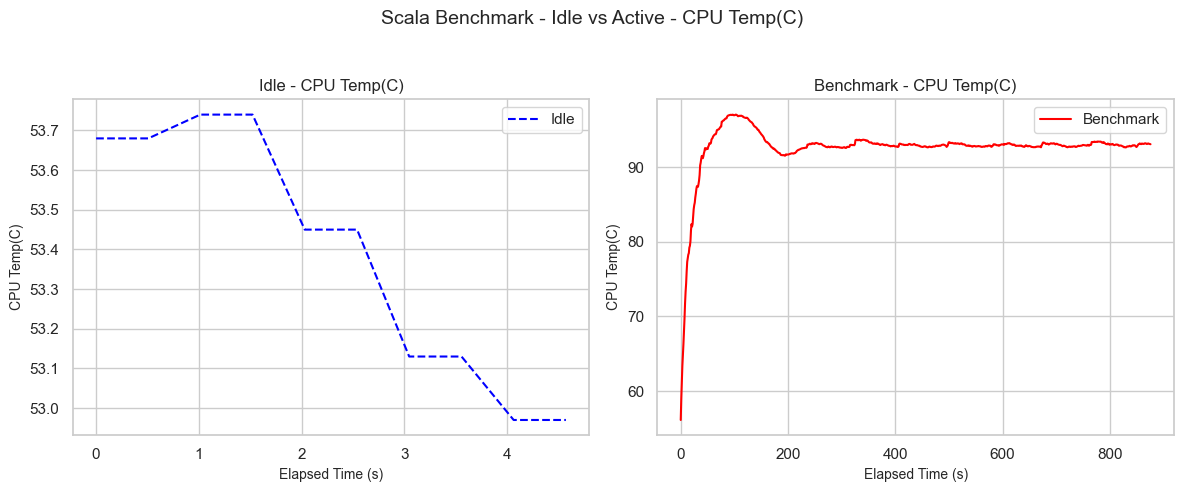

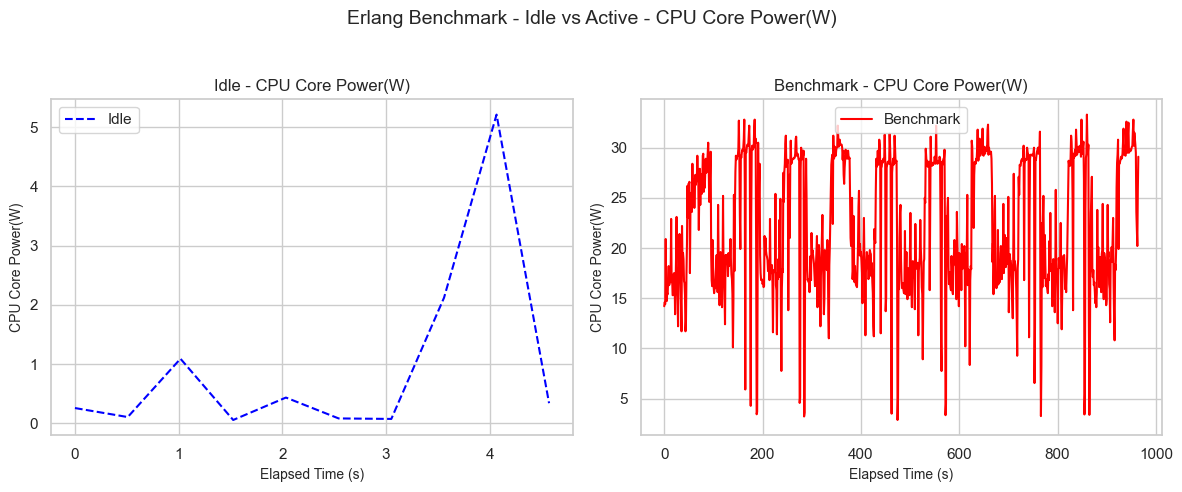

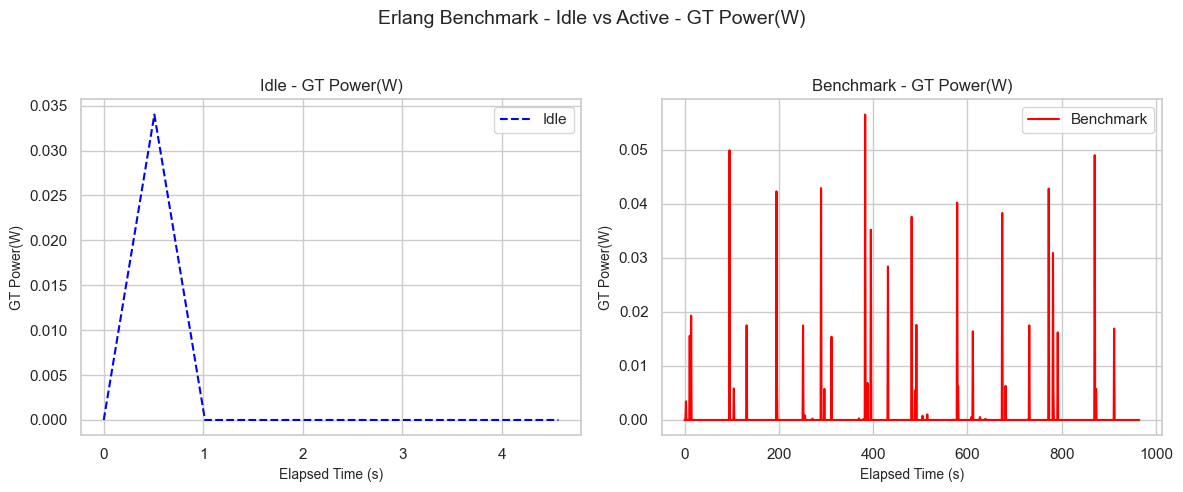

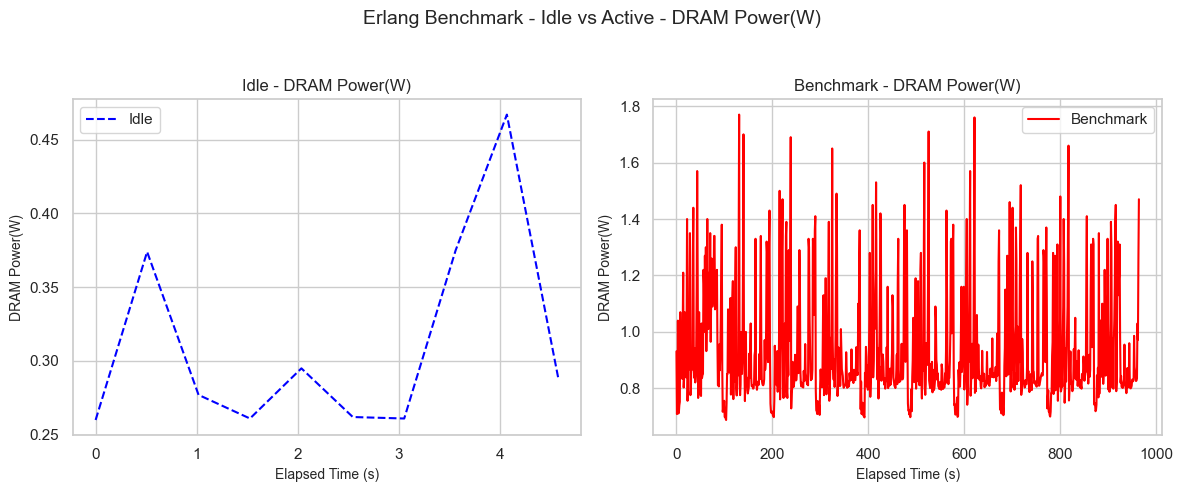

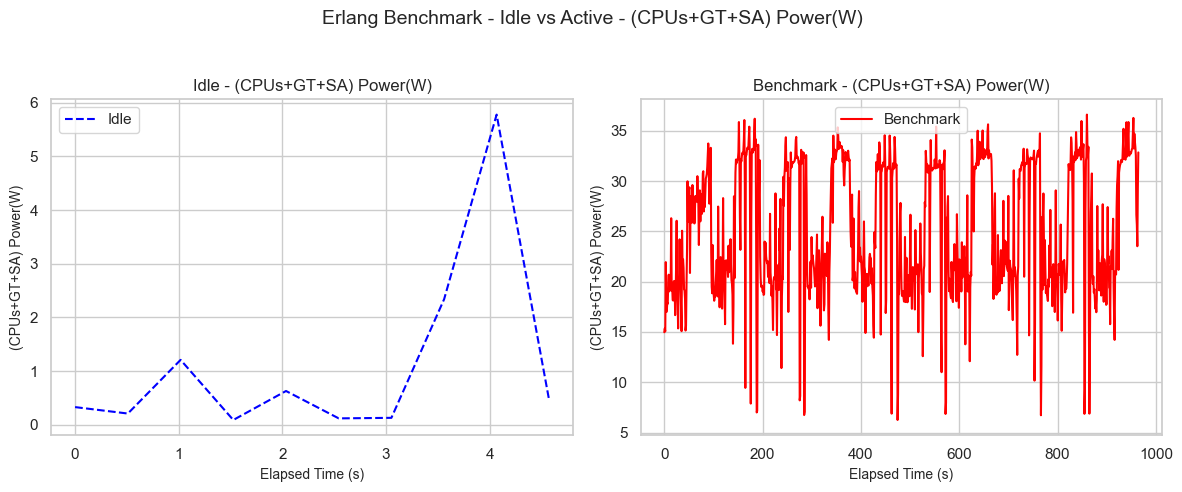

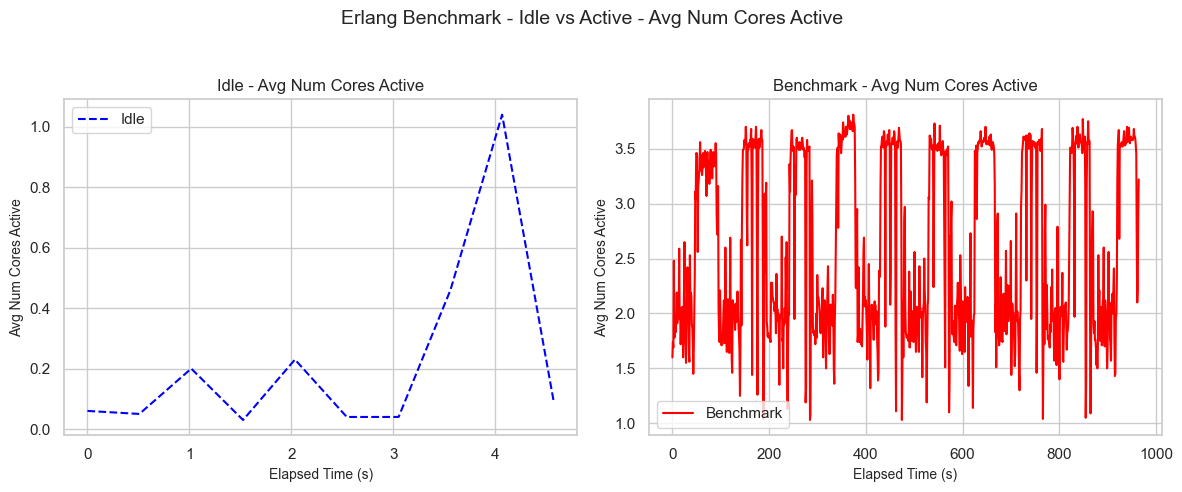

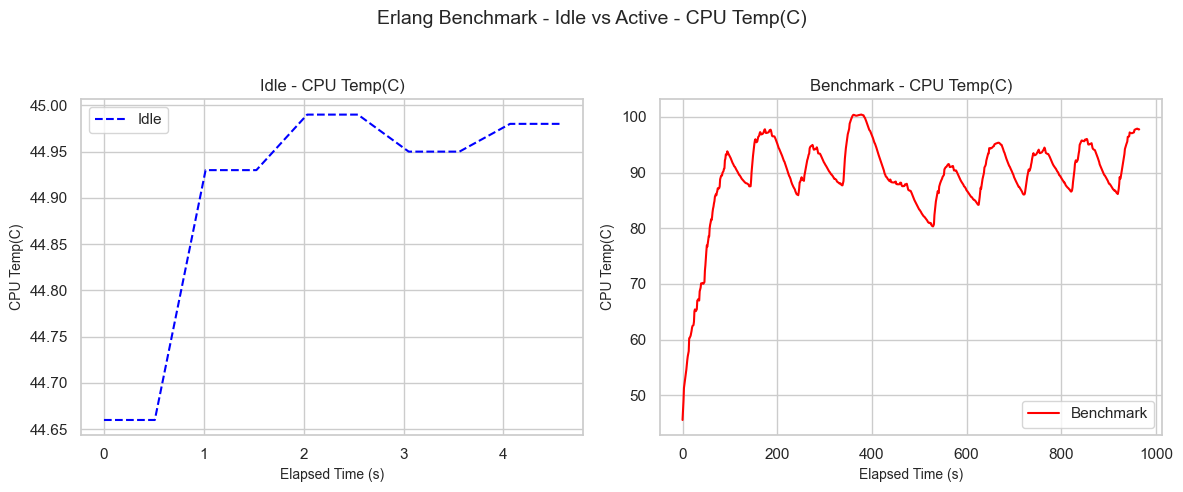

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_message_count(n):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if n >= 1_000_000_000:
        return f"{n // 1_000_000_000}B"
    elif n >= 1_000_000:
        return f"{n // 1_000_000}M"
    elif n >= 1_000:
        return f"{n // 1_000}K"
    return str(n)

message_label = format_message_count(N)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

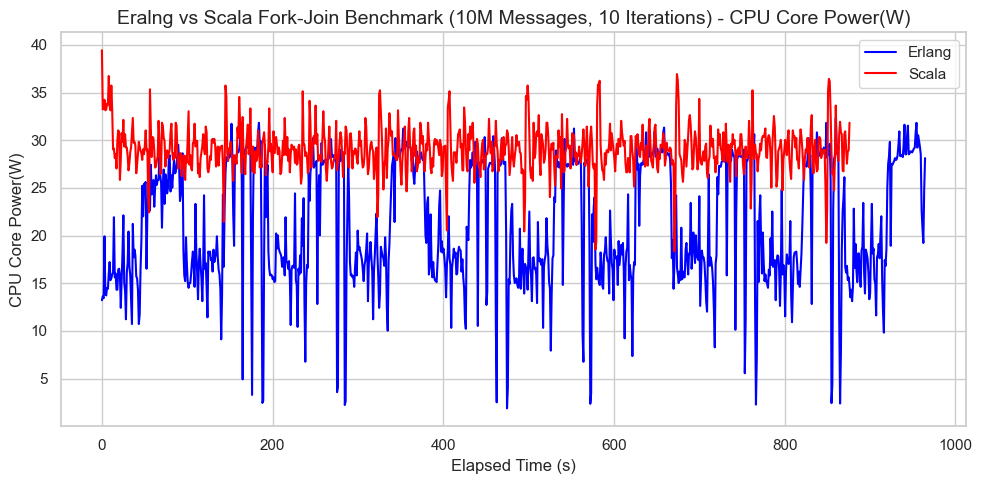

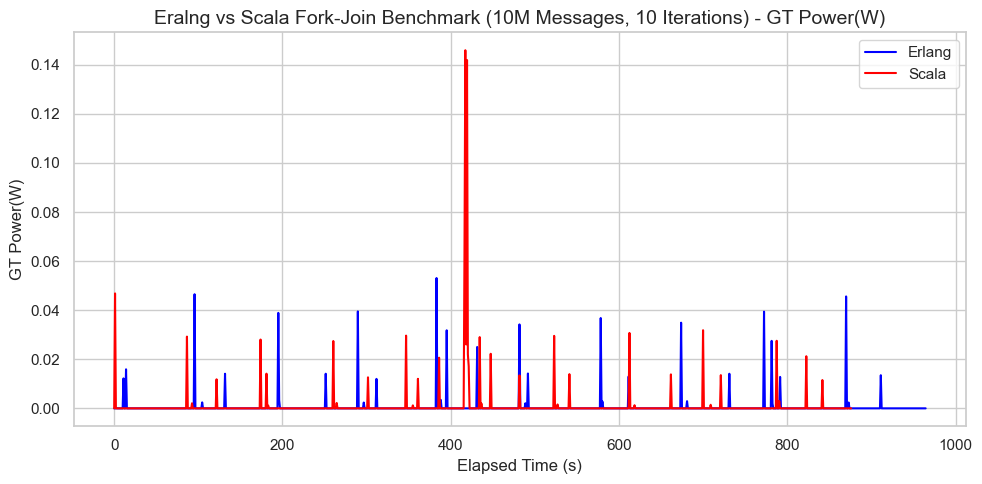

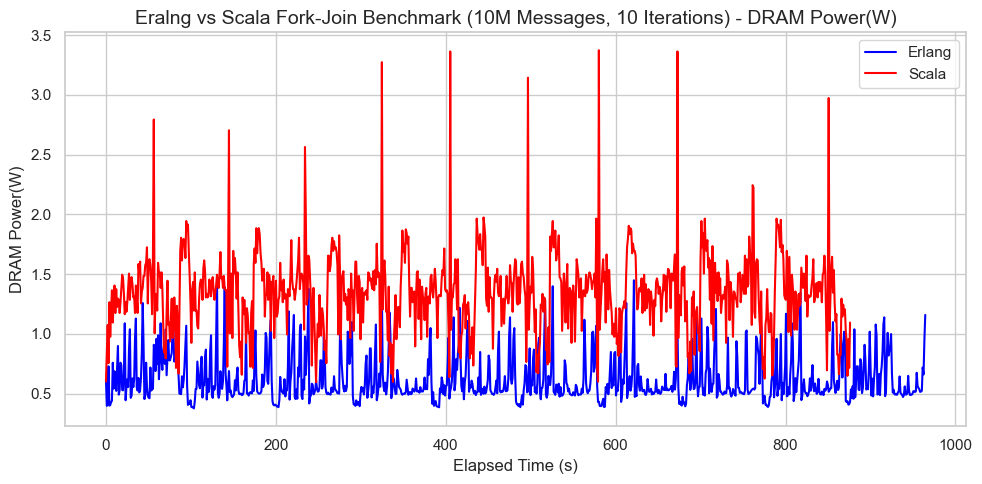

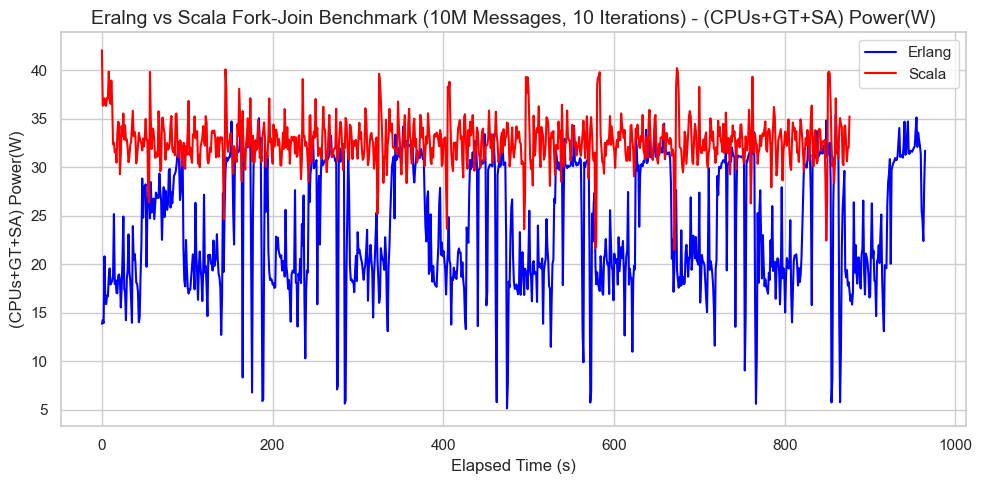

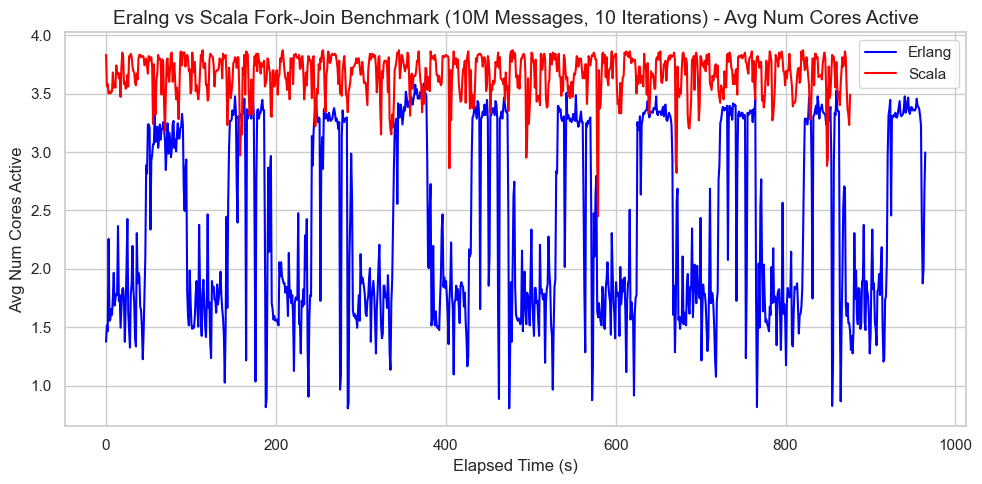

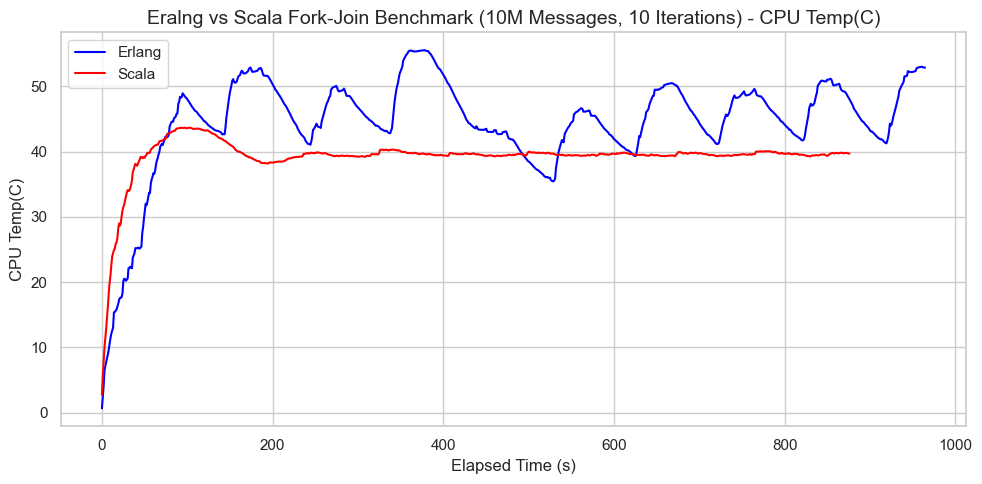

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Fork-Join Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        29.032688
GT Power(W)              -0.002837
DRAM Power(W)             1.348923
(CPUs+GT+SA) Power(W)    32.663725
CPU Temp(C)              39.220656
Avg Num Cores Active      3.666367
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        21.285772
GT Power(W)              -0.002643
DRAM Power(W)             0.622439
(CPUs+GT+SA) Power(W)    24.033938
CPU Temp(C)              44.481521
Avg Num Cores Active      2.389406
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")



Results appended to ../../data/fjcreate/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 26641.183669941212 Joules
Erlang Benchmark: 21150.41876440763 Joules
